# Deep Learning für Ingenieure WS25/26

**Programming tasks**

TODO: Add name, matrikelnummer and Studiengang, but don't push to git

## Task 1: Agricultural Sciences and Harvest

As an agricultural scientist, you want to develop a model that can predict the harvest yield of a specific field based on applied fertilizer (in kilograms per hectare) and the average precipitation during the growing season (in millimeters). Your research focuses on optimizing agricultural yields through predictive models.

**Problem statement**
* Load the file `harvest.csv`.
* Print the first 5 rows of the dataset to the command line.
* Write a Python program `p1_regression` that visualizes the data as follows. Use the libraries `pandas`, `numpy`, `matplotlib`, `mpl_toolkits.mplot3d`.
* Use `seaborn` to display the pairwise relationships between the following variables in `p1_regression`. Use the libraries `pandas`, `numpy`, `matplotlib`, `mpl_toolkits.mplot3d`.
* Randomize the dataset. Split the data in `p2_regression` into training and test data (80% training, 20% test). Create a model in Keras with 2 hidden layers, each with 4 nodes and ReLU activation. Use Mean Squared Error as the loss function, and the Adam optimizer. Train the model for 100 epochs, with a batch size of 50.
* Plot the loss curves for training and test.
* Plot the model and the data (separated by test and training data).
* Finally compute the model’s predicted values for the following input pairs: Precipitation/Fertilizer: [0.25, 0.25], [0.85, 0.75].

In [24]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import tensorflow as tf

d:\Python\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


### Load CSV and display first rows

In [6]:
# Load harvest.csv as a DataFrame
harvest_df = pd.read_csv('harvest.csv')

# Display the first five rows of the DataFrame
print(harvest_df.head(5))

     Dünger  Niederschlag    Ertrag
0  0.374540      0.950714  3.042819
1  0.731994      0.598658  3.259764
2  0.156019      0.155995  0.818065
3  0.058084      0.866176  1.967662
4  0.601115      0.708073  3.275469


### Visualize the data in a 3D-plot

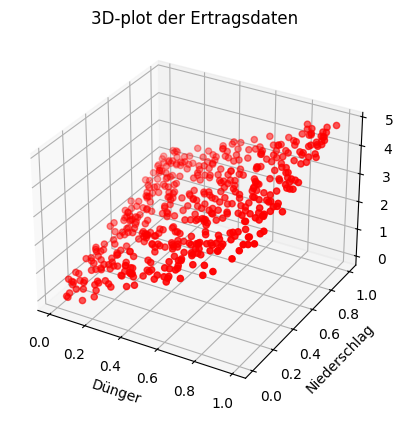

In [9]:
# Create figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.scatter(harvest_df['Dünger'], harvest_df['Niederschlag'], harvest_df['Ertrag'], c='r', marker='o')

# Options
ax.set_xlabel('Dünger')
ax.set_ylabel('Niederschlag')
ax.set_zlabel('Ertrag')

ax.set_title('3D-plot der Ertragsdaten')

plt.show()

### Show pair plots, using seaborn

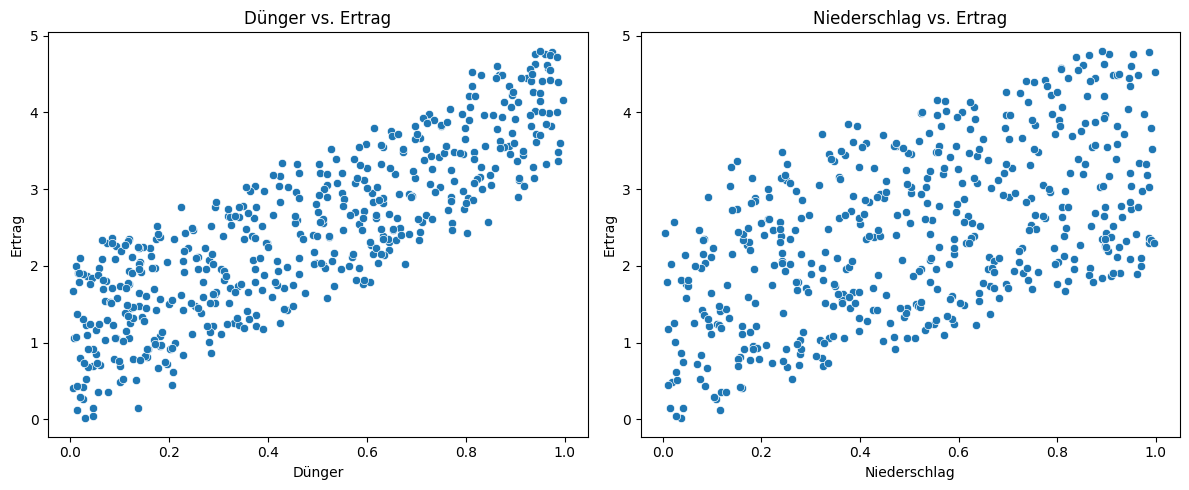

In [21]:
# Create subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot
sns.scatterplot(data=harvest_df, x='Dünger', y='Ertrag', ax=axes[0])
sns.scatterplot(data=harvest_df, x='Niederschlag', y='Ertrag', ax=axes[1])

# Options
axes[0].set_title('Dünger vs. Ertrag')
axes[1].set_title('Niederschlag vs. Ertrag')
plt.tight_layout()
plt.show()

### Randomising the dataset, creating training and test data

In [23]:
# Randomize dataset and split into training and test sets
train_dataset = harvest_df.sample(frac=0.8, random_state=0)
test_dataset = harvest_df.drop(train_dataset.index)

# Split features and labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Ertrag')
test_labels = test_features.pop('Ertrag')

# Display mean and standard deviation of training features
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
Dünger,0.465685,0.296174
Niederschlag,0.512570,0.286376
Ertrag,2.436352,1.060531


### Create and train the model

In [33]:
# Define a function to plot loss curves
def plot_loss(history):
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Test Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [30]:
# Define the model
harvest_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

# Compile the model
harvest_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with 100 epochs and a batch size of 50
history = harvest_model.fit(
    train_features,
    train_labels,
    epochs=100,
    batch_size=50,
    validation_split=0.2,
    verbose=0
)

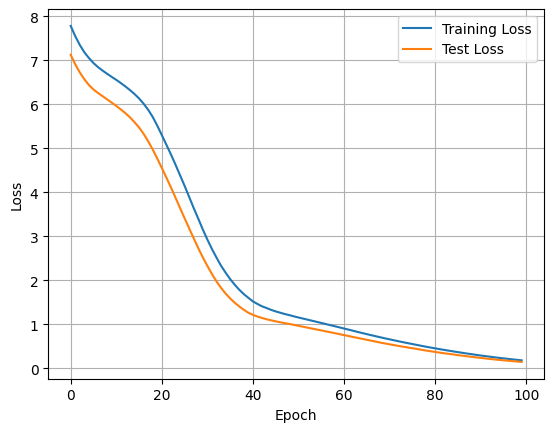

In [34]:
# Plot the loss curves
plot_loss(history)

### Plotting model and data (split by test- and training-data)

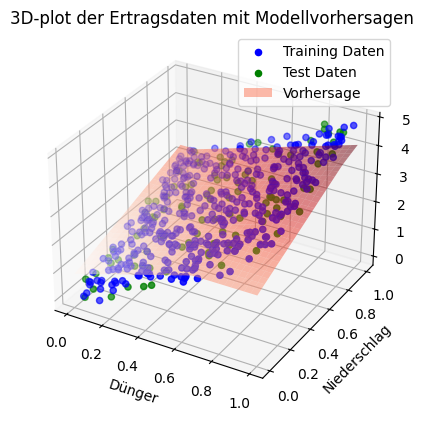

In [ ]:
# Create 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot
ax.scatter(train_dataset['Dünger'], train_dataset['Niederschlag'], train_dataset['Ertrag'], c='b', marker='o')
ax.scatter(test_dataset['Dünger'], test_dataset['Niederschlag'], test_dataset['Ertrag'], c='g', marker='o')

# MODEL PREDICTIONS: Create prediction surface/mesh
# Generate grid for predictions
fertilizer_range = np.linspace(train_dataset['Dünger'].min(), train_dataset['Dünger'].max(), 30)
rainfall_range = np.linspace(train_dataset['Niederschlag'].min(), train_dataset['Niederschlag'].max(), 30)
fertilizer_grid, rainfall_grid = np.meshgrid(fertilizer_range, rainfall_range)

# Reshape grid for model prediction (model expects 2D input: [samples, features])
grid_input = np.column_stack([fertilizer_grid.ravel(), rainfall_grid.ravel()])
grid_predictions = harvest_model.predict(grid_input, verbose=0).flatten()

# Reshape predictions back to grid shape
Z_pred = grid_predictions.reshape(fertilizer_grid.shape)

# Plot model prediction surface
ax.plot_surface(fertilizer_grid, rainfall_grid, Z_pred, alpha=0.5, cmap='Reds', linewidth=0)

# Options
ax.set_xlabel('Dünger')
ax.set_ylabel('Niederschlag')
ax.set_zlabel('Ertrag')
ax.set_title('3D-plot der Ertragsdaten mit Modellvorhersagen')


ax.legend(['Training Daten', 'Test Daten', 'Vorhersage'])
plt.show()

### Make predictions based on given value-pairs

In [55]:
# Define input value-pairs
input_1 = np.array([[0.25, 0.25]])
input_2 = np.array([[0.85, 0.75]])

# Make predictions
prediction_1 = harvest_model.predict(input_1, verbose=0)
prediction_2 = harvest_model.predict(input_2, verbose=0)

# Print results
print(f'Prediction for Fertilizer={input_1[0][0]}, Rainfall={input_1[0][1]}: Yield={prediction_1[0][0]:.4f}')
print(f'Prediction for Fertilizer={input_2[0][0]}, Rainfall={input_2[0][1]}: Yield={prediction_2[0][0]:.4f}')

Prediction for Fertilizer=0.25, Rainfall=0.25: Yield=1.6939
Prediction for Fertilizer=0.85, Rainfall=0.75: Yield=3.5238


## Task 2: Thin-billed Gulls and Bighorn Sheep

Distinguishing between thin-billed gulls and bighorn sheep presents an interesting and relevant challenge in biological research and nature conservation. These two species are not only ecologically significant but also fascinating in their behavior and habitats. The ability to differentiate between them is therefore essential for further professional development.

**Problem statement**
* Load the file `animals.csv`.
* Print the first 5 rows of the dataset to the command line.
* Write a Python program `p1_classification` that visualizes the data as follows. Use the libraries `pandas` and `matplotlib`.
* Randomize the dataset. Encode the labels as numeric values so they can be processed by TensorFlow. Split the data in `p2_classification` into training and test data (80% training, 20% test). Create a model in Keras with 2 hidden layers, each with 4 nodes and ReLU activation. The output node should use the sigmoid activation function. Use Binary Cross Entropy as the loss function and the Adam optimizer. Train the model for 50 (or more) epochs with a batch size of 100.
* Plot the loss function for training and test. How does the progression differ between few and many epochs?
* Plot the learned model and the test data using `matplotlib`’s `contourf` and `scatter`.
* Finally compute the model’s predicted values for the following input pairs: Circumference/Size: [90, 90], [70, 70].